# Tree ensembles

## Contents in this notebook:
1. [Notebook setup](#setup)
2. [Decision tree](#tree)
3. [Random forest](#forest)
5. [Gradient boosting](#xgboost)

## 1. Notebook setup <a name="setup"></a>

In [1]:
# Install required packages.
# !pip install requirements.txt

# Change directory to main project folder.
import os
print(f'This folder: {os.getcwd()}')
os.chdir("..")
print(f'Project folder: {os.getcwd()}\n')

# Import packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dill as pickle

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, ParameterGrid, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor

This folder: C:\Users\muell\thesis_main\thesis_code\notebooks
Project folder: C:\Users\muell\thesis_main\thesis_code



In [2]:
# Load training data

X_train = pd.read_pickle('data/generated_final_pickle/df_features_train.pickle')
y_train = X_train.pop('distance')
print(X_train.shape, y_train.shape)

(80000, 43) (80000,)


In [3]:
results = {}

## 2. Decision tree <a name="tree"></a>

In [10]:
# DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=42)

# cross validation
scores_tree = abs(cross_val_score(
    regr, X_train, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'RMSE (mean, std): %.3f (%.3f)' % (scores_tree.mean(), scores_tree.std()))

# store result
results['DecisionTreeRegressor'] = [scores_tree.mean(), scores_tree.std()]

RMSE (mean, std): 1671.421 (18.811)


In [11]:
pd.DataFrame(results, index=['mean(RMSE)', 'std(RMSE)']).T.sort_values('mean(RMSE)')

,mean(RMSE),std(RMSE)
DecisionTreeRegressor,1671.421257,18.811115


{'whiskers': [<matplotlib.lines.Line2D at 0x273ec200490>,
 'caps': [<matplotlib.lines.Line2D at 0x273ec200af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x273ec2001c0>],
 'medians': [<matplotlib.lines.Line2D at 0x273ec231a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x273ec231df0>],
 'means': []}

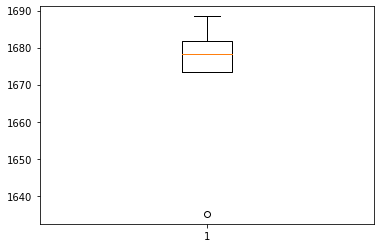

In [12]:
plt.boxplot(scores_tree)

In [6]:
# save model
regr.fit(X_train, y_train)
# with open('models/decision_tree.pkl', 'wb') as f:
#     pickle.dump(regr, f)

33


[Text(0.5, 0.875, 'NumVehMin <= 15.857\nsquared_error = 30571015.869\nsamples = 80000\nvalue = 7736.603'),
 Text(0.25, 0.625, 'Perimeter <= 2234.732\nsquared_error = 16020352.331\nsamples = 76443\nvalue = 7105.11'),
 Text(0.125, 0.375, 'Perimeter <= 1425.832\nsquared_error = 6086601.976\nsamples = 38357\nvalue = 4722.766'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumCust <= 58.5\nsquared_error = 14552225.352\nsamples = 38086\nvalue = 9504.405'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Perimeter <= 2185.995\nsquared_error = 150526206.948\nsamples = 3557\nvalue = 21307.93'),
 Text(0.625, 0.375, 'Perimeter <= 1355.606\nsquared_error = 68346635.993\nsamples = 1660\nvalue = 14456.957'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumVehMin <= 29.031\nsquared_error = 145426140.043\nsamples = 1897\nvalue = 27302.983'),
 Tex

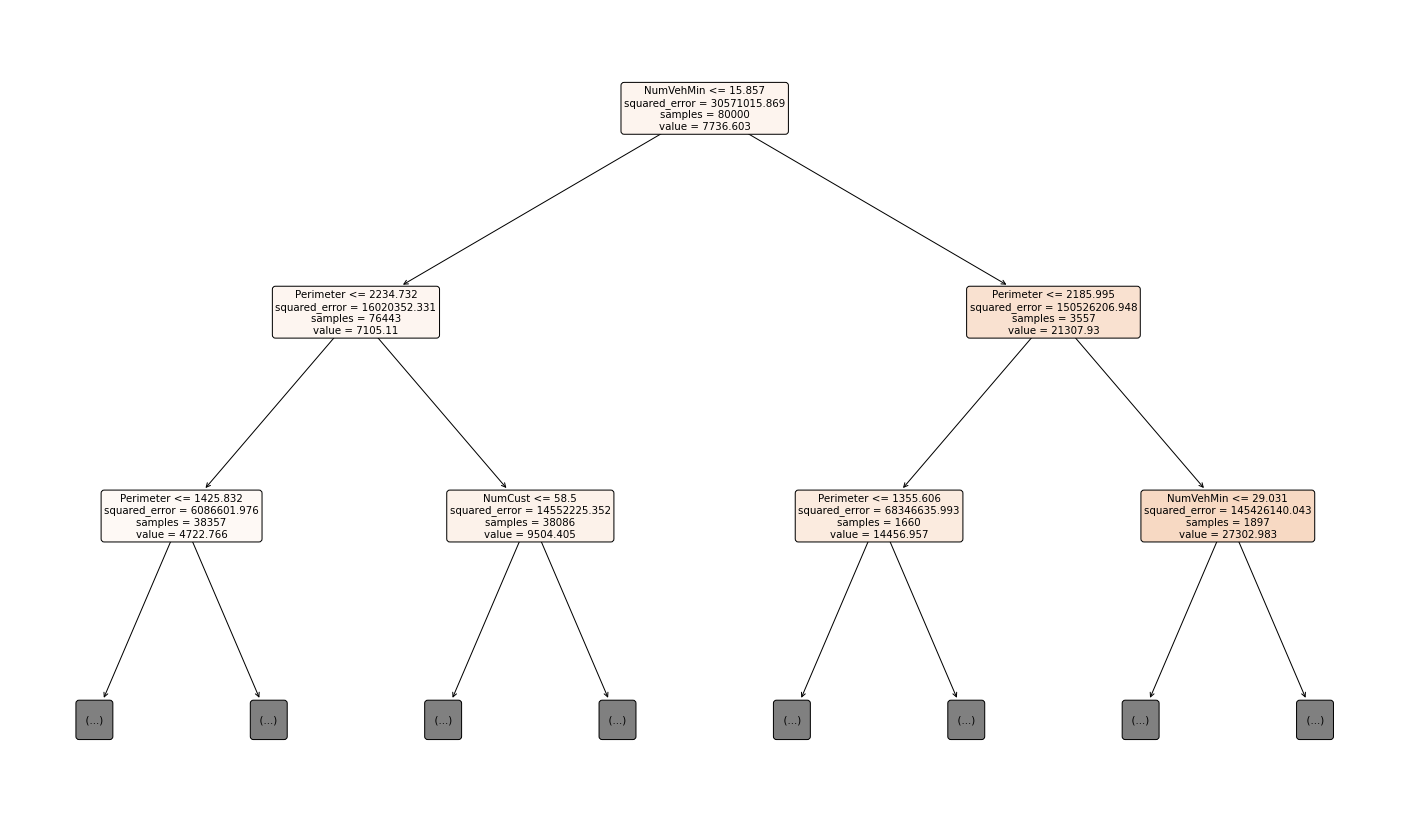

In [7]:
# Visualize

print(regr.tree_.max_depth)

plt.figure(figsize=(25,15))
plot_tree(regr, filled=True, max_depth=2, rounded=True, feature_names=X_train.columns)

## 3. Random forest <a name="forest"></a>

In [8]:
# RandomForestRegressor
regr = RandomForestRegressor(verbose=3, random_state=42)

# cross validation
scores = abs(cross_val_score(
    regr, X_train, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'RMSE (mean, std): %.3f (%.3f)' % (scores.mean(), scores.std()))

# store result
results['RandomForestRegressor'] = [scores.mean(), scores.std()]

RMSE (mean, std): 1008.687 (33.793)


In [9]:
pd.DataFrame(results, index=['mean(RMSE)', 'std(RMSE)']).T.sort_values('mean(RMSE)')

,mean(RMSE),std(RMSE)
RandomForestRegressor,1008.686744,33.792708
DecisionTreeRegressor,1671.421257,18.811115


In [11]:
# save model
regr = RandomForestRegressor(verbose=3, random_state=42, n_jobs=5)
regr.fit(X_train, y_train)
with open('models/ensemble_random_forest.pkl', 'wb') as f:
    pickle.dump(regr, f)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100


[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   41.0s


building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68

[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  2.8min finished


### Determine n_estimators

In [80]:
for i in [10, 20, 50, 100]:    # XGBRegressor
    
    regr = RandomForestRegressor(verbose=3, random_state=42, n_estimators = i, n_jobs=5)

    # cross validation
    scores_rf = abs(cross_val_score(
        regr, X_train, y_train, 
        scoring='neg_root_mean_squared_error', 
        cv=KFold(n_splits=5), verbose=0, n_jobs=5))
    print(f'n_estimators: {i}, RMSE (mean, std): %.3f (%.3f)' % (scores_rf.mean(), scores_rf.std()))

n_estimators: 10, RMSE (mean, std): 1095.891 (44.085)
n_estimators: 20, RMSE (mean, std): 1053.925 (43.743)
n_estimators: 50, RMSE (mean, std): 1020.606 (38.527)
n_estimators: 100, RMSE (mean, std): 1008.687 (33.793)


### Hyperparameter tuning

In [4]:
param_grid = {
    'max_features': ['auto', 'sqrt'], 
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': range(2, 10), 
    'min_samples_leaf': range(2, 6)}

In [5]:
rf = RandomForestRegressor(n_estimators=20)

param_comb=30

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid, 
    scoring='neg_root_mean_squared_error', 
    verbose=2, 
    n_jobs=4, 
    cv=4, 
    random_state=42, 
    n_iter=param_comb
)

In [6]:
import time
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()
print('Time elapsed:', t1-t0)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Time elapsed: 1264.033763408661


In [7]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
print('\n Best score')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('models/rf-random-grid-search-results-cycle1.csv', index=False)


 Best score
-1051.0551595449676

 Best hyperparameters:
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}


In [8]:
#pd.concat([pd.read_csv('models/xgb-random-grid-search-results-01.csv'), pd.read_csv('models/xgb-random-grid-search-results-02.csv')])
df = pd.read_csv('models/rf-random-grid-search-results-cycle1.csv')
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
28,91.929058,0.120003,0.207871,0.003878,2,2,auto,NaN,"{'min_samples_split': 2, 'min_samples_leaf': 2...",-1001.236490,-1058.934057,-1058.854094,-1085.195997,-1051.055160,30.701779,1
13,88.871020,0.638347,0.188541,0.002441,7,2,auto,40.0,"{'min_samples_split': 7, 'min_samples_leaf': 2...",-1002.447422,-1063.889973,-1062.411694,-1076.725722,-1051.368703,28.788018,2
0,88.701334,0.337682,0.194501,0.013049,6,3,auto,40.0,"{'min_samples_split': 6, 'min_samples_leaf': 3...",-1009.901878,-1073.509704,-1049.872131,-1077.139125,-1052.605709,26.785981,3
12,90.392931,0.203643,0.199001,0.003534,5,2,auto,30.0,"{'min_samples_split': 5, 'min_samples_leaf': 2...",-991.921014,-1065.153861,-1069.536650,-1083.942226,-1052.638438,35.737648,4
24,86.889419,0.309407,0.181209,0.004713,9,3,auto,NaN,"{'min_samples_split': 9, 'min_samples_leaf': 3...",-1020.296021,-1083.006077,-1053.042873,-1090.846133,-1061.797776,27.805769,5
3,91.676844,0.400644,0.195603,0.005861,6,3,auto,50.0,"{'min_samples_split': 6, 'min_samples_leaf': 3...",-1004.743013,-1070.711113,-1078.344092,-1094.151952,-1061.987542,34.114230,6
22,89.914011,0.207458,0.194461,0.005259,3,3,auto,NaN,"{'min_samples_split': 3, 'min_samples_leaf': 3...",-1023.468863,-1067.751193,-1074.516531,-1084.435310,-1062.542974,23.326766,7
16,85.094247,0.401600,0.166660,0.002340,2,5,auto,20.0,"{'min_samples_split': 2, 'min_samples_leaf': 5...",-1020.639787,-1084.559108,-1072.668320,-1085.179196,-1065.761602,26.523905,8
26,87.623551,0.448656,0.177240,0.004643,3,4,auto,20.0,"{'min_samples_split': 3, 'min_samples_leaf': 4...",-1010.414084,-1085.083943,-1067.449167,-1101.869405,-1066.204150,34.433046,9
27,14.491652,0.075431,0.201788,0.005259,6,2,sqrt,50.0,"{'min_samples_split': 6, 'min_samples_leaf': 2...",-1240.155530,-1291.924793,-1295.844133,-1313.993573,-1285.479507,27.460344,10


### Final model

In [12]:
# save model
rf = RandomForestRegressor(
    verbose=1, 
    n_estimators=100, 
    min_samples_split=2, 
    min_samples_leaf=2, 
    max_features='auto', 
    max_depth=None, 
    n_jobs=5)
rf.fit(X_train, y_train)
# with open('models/ensemble_rf.pkl', 'wb') as f:
#     pickle.dump(rf, f)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:  2.6min finished


In [4]:
# HistGradientBoostingRegressor
regr = HistGradientBoostingRegressor(max_iter=400, verbose=1, random_state=42)

# cross validation
scores = abs(cross_val_score(
    regr, X_train, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'RMSE (mean, std): %.3f (%.3f)' % (scores.mean(), scores.std()))

# store result
results['HistGradientBoostingRegressor'] = [scores.mean(), scores.std()]

RMSE (mean, std): 712.078 (26.255)


In [15]:
pd.DataFrame(results, index=['mean(RMSE)', 'std(RMSE)']).T.sort_values('mean(RMSE)')

,mean(RMSE),std(RMSE)
HistGradientBoostingRegressor,712.078042,26.254768
DecisionTreeRegressor,1671.421257,18.811115


In [5]:
# save model
regr.fit(X_train, y_train)
with open('models/ensemble_gradient_boosting.pkl', 'wb') as f:
    pickle.dump(regr, f)

Binning 0.025 GB of training data: 0.807 s
Binning 0.003 GB of validation data: 0.015 s
Fitting gradient boosted rounds:
[1/400] 1 tree, 31 leaves, max depth = 7, train loss: 12951961.20340, val loss: 12773424.58551, in 0.066s
[2/400] 1 tree, 31 leaves, max depth = 7, train loss: 11019400.65969, val loss: 10842353.48396, in 0.067s
[3/400] 1 tree, 31 leaves, max depth = 7, train loss: 9400572.47632, val loss: 9263000.56627, in 0.062s
[4/400] 1 tree, 31 leaves, max depth = 7, train loss: 8075088.89619, val loss: 7960540.24420, in 0.175s
[5/400] 1 tree, 31 leaves, max depth = 7, train loss: 6951721.90938, val loss: 6843062.04099, in 0.064s
[6/400] 1 tree, 31 leaves, max depth = 7, train loss: 6014522.26140, val loss: 5933625.74559, in 0.063s
[7/400] 1 tree, 31 leaves, max depth = 6, train loss: 5228719.49461, val loss: 5139983.75980, in 0.063s
[8/400] 1 tree, 31 leaves, max depth = 7, train loss: 4574064.30700, val loss: 4488279.89753, in 0.068s
[9/400] 1 tree, 31 leaves, max depth = 7, t

In [8]:
regr.__dict__

{'loss': 'squared_error',
 'learning_rate': 0.1,
 'max_iter': 400,
 'max_leaf_nodes': 31,
 'max_depth': None,
 'min_samples_leaf': 20,
 'l2_regularization': 0.0,
 'max_bins': 255,
 'monotonic_cst': None,
 'categorical_features': None,
 'warm_start': False,
 'early_stopping': 'auto',
 'scoring': 'loss',
 'validation_fraction': 0.1,
 'n_iter_no_change': 10,
 'tol': 1e-07,
 'verbose': 1,
 'random_state': 42,
 'feature_names_in_': array(['NumCust', 'AreaRoot', 'Perimeter', 'SideRatio', 'CentDepot',
        'CentCustAvg', 'CentCustStd', 'Dispersion', 'AvgFurthest',
        'AvgNearest', 'DepCustAvg', 'DepCustStd', 'DepCustMin',
        'DepCustMed', 'DepCustMax', 'IntCustLinks', 'IntCustAvg',
        'IntCustStd', 'IntCustMin', 'IntCustMed', 'IntCustMax', 'CapRatio',
        'NumVehMin', 'DemAvg', 'DemStd', 'DemMin', 'DemMed', 'DemMax',
        'PossRounds', 'StAvg', 'StStd', 'StMin', 'StMed', 'StMax',
        'TwShare', 'TwWidthAvg', 'TwWidthStd', 'TwWidthMin', 'TwWidthMed',
        'TwCen

In [ ]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80],
#     'max_features': [2],
#     'min_samples_leaf': [3, 4],
#     'min_samples_split': [8],
#     'n_estimators': [100]
# }
# reg = HistGradientBoostingRegressor(verbose=3)

# grid_search = GridSearchCV(
#     reg, 
#     param_grid, 
#     n_jobs=4, 
#     cv=3, 
#     verbose=4)
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)

## 4. Gradient boosting <a name="xgboost"></a>

In [4]:
# XGBRegressor
regr = XGBRegressor(verbosity=2, random_state=42)

# cross validation
scores_xgb = abs(cross_val_score(
    regr, X_train, y_train, 
    scoring='neg_root_mean_squared_error', 
    cv=KFold(n_splits=5), verbose=0, n_jobs=5))
print(f'RMSE (mean, std): %.3f (%.3f)' % (scores_xgb.mean(), scores_xgb.std()))

# store result
results['XGBRegressor'] = [scores_xgb.mean(), scores_xgb.std()]

RMSE (mean, std): 829.728 (24.553)


In [5]:
regr.__dict__

{'n_estimators': 100,
 'objective': 'reg:squarederror',
 'max_depth': None,
 'learning_rate': None,
 'verbosity': 2,
 'booster': None,
 'tree_method': None,
 'gamma': None,
 'min_child_weight': None,
 'max_delta_step': None,
 'subsample': None,
 'colsample_bytree': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'base_score': None,
 'missing': nan,
 'num_parallel_tree': None,
 'random_state': 42,
 'n_jobs': None,
 'monotone_constraints': None,
 'interaction_constraints': None,
 'importance_type': None,
 'gpu_id': None,
 'validate_parameters': None,
 'predictor': None,
 'enable_categorical': False}

In [5]:
pd.DataFrame(results, index=['mean(RMSE)', 'std(RMSE)']).T.sort_values('mean(RMSE)')

,mean(RMSE),std(RMSE)
XGBRegressor,829.727982,24.552532


In [17]:
# save model
regr.fit(X_train, y_train)
with open('models/ensemble_extreme_boosting.pkl', 'wb') as f:
    pickle.dump(regr, f)

[11:18:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:18:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:18:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:18:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:18:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=6
[11:18:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nod

### Find n_estimators

In [7]:
for i in [50, 100, 150, 200, 300]:    # XGBRegressor
    regr = XGBRegressor(verbosity=2, random_state=42, n_estimators = i)

    # cross validation
    scores_xgb = abs(cross_val_score(
        regr, X_train, y_train, 
        scoring='neg_root_mean_squared_error', 
        cv=KFold(n_splits=5), verbose=0, n_jobs=5))
    print(f'n_estimators: {i}, RMSE (mean, std): %.3f (%.3f)' % (scores_xgb.mean(), scores_xgb.std()))

n_estimators: 50, RMSE (mean, std): 873.084 (27.579)
n_estimators: 100, RMSE (mean, std): 829.728 (24.553)
n_estimators: 150, RMSE (mean, std): 812.690 (25.440)
n_estimators: 200, RMSE (mean, std): 805.281 (26.048)


### Hyperparameter tuning cycle 1

In [8]:
param_grid = {
    'learning_rate': [0.5, 0.3, 0.1, 0.05, 0.01], 
    'gamma': [0,0.25,0.5,1.0,1.5,2,5], 
    'max_depth': range(2, 10, 1), 
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'reg_lambda': [0,1.0,10.0],
    'scale_pos_weight': [1,3,5]}
    
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=100)

param_comb=10

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid, 
    scoring='neg_root_mean_squared_error', 
    verbose=2, 
    n_jobs=5, 
    cv=4, 
    random_state=42, 
    n_iter=param_comb
)

In [9]:
import time
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()
print('Time elapsed:', t1-t0)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Time elapsed: 705.7297909259796


In [10]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
print('\n Best score')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('models/xgb-random-grid-search-results-cycle1.csv', index=False)


 Best score
-738.1786465368491

 Best hyperparameters:
{'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 10.0, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 1.0}


In [13]:
#pd.concat([pd.read_csv('models/xgb-random-grid-search-results-01.csv'), pd.read_csv('models/xgb-random-grid-search-results-02.csv')])
df = pd.read_csv('models/xgb-random-grid-search-results-cycle1.csv')
df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_reg_lambda,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
6,172.096907,2.719855,0.070335,0.013558,1.0,5,10.0,10,9,0.10,1.50,1.0,"{'subsample': 1.0, 'scale_pos_weight': 5, 'reg...",-705.824853,-751.704428,-750.970781,-744.214524,-738.178647,18.906251,1
4,59.459052,6.082640,0.081001,0.008687,0.6,5,1.0,1,5,0.10,1.50,0.8,"{'subsample': 0.6, 'scale_pos_weight': 5, 'reg...",-816.275026,-830.817184,-849.722174,-871.624163,-842.109637,20.760567,2
1,46.551664,4.674692,0.086752,0.020264,1.0,3,10.0,5,4,0.30,0.00,0.6,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-896.657547,-892.172079,-920.442263,-909.775774,-904.761916,11.126509,3
9,90.364851,6.897866,0.055500,0.010805,0.6,1,10.0,10,7,0.05,5.00,1.0,"{'subsample': 0.6, 'scale_pos_weight': 1, 'reg...",-876.498722,-937.453677,-946.783762,-954.806455,-928.885654,30.862728,4
8,67.023075,0.166826,0.089501,0.019653,1.0,3,10.0,1,5,0.05,2.00,0.8,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-1040.225263,-1086.958107,-1106.713273,-1113.458576,-1086.838805,28.620112,5
5,24.537812,0.860218,0.064751,0.018940,0.8,3,1.0,10,2,0.05,5.00,0.8,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-2081.355900,-2130.765947,-2140.441487,-2157.622215,-2127.546387,28.349452,6
3,87.349120,6.859317,0.087999,0.021989,0.8,1,0.0,5,7,0.01,0.25,0.6,"{'subsample': 0.8, 'scale_pos_weight': 1, 'reg...",-3878.364741,-3938.255726,-3903.741477,-3934.352049,-3913.678498,24.378483,7
7,88.398466,4.454418,0.090253,0.013609,0.6,3,1.0,10,7,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 3, 'reg...",-3924.902285,-3990.921698,-3952.124769,-3988.484724,-3964.108369,27.358202,8
2,105.090849,4.433393,0.095831,0.032114,0.8,3,10.0,5,7,0.01,0.50,1.0,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-3938.745855,-4020.001202,-3977.971223,-4033.261421,-3992.494925,37.142977,9
0,48.919646,0.360364,0.062261,0.004450,0.6,1,0.0,1,5,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 1, 'reg...",-4051.253910,-4105.651145,-4072.919965,-4115.946656,-4086.442919,25.790323,10


### Hyperparameter tuning cycle 2

In [ ]:
# make some adjustments

In [15]:
param_grid = {
    'learning_rate': [0.5, 0.3, 0.1, 0.05], 
    'gamma': [0,0.25,0.5,1.0,1.5,2,5], 
    'max_depth': range(2, 10, 1), 
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'reg_lambda': [0,1.0,10.0],
    'scale_pos_weight': [2,4,5]}
    
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=100)

param_comb=10

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid, 
    scoring='neg_root_mean_squared_error', 
    verbose=2, 
    n_jobs=5, 
    cv=4, 
    random_state=2, 
    n_iter=param_comb
)

In [16]:
import time
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()
print('Time elapsed:', t1-t0)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Time elapsed: 681.6091592311859


In [17]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
print('\n Best score')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('models/xgb-random-grid-search-results-cycle2.csv', index=False)


 Best score
-739.3756526385001

 Best hyperparameters:
{'subsample': 0.8, 'scale_pos_weight': 4, 'reg_lambda': 1.0, 'min_child_weight': 10, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [40]:
df = pd.concat([pd.read_csv('models/xgb-random-grid-search-results-cycle1.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle2.csv')])
df.sort_values('rank_test_score')#.groupby('param_max_depth').mean()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_reg_lambda,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
6,172.096907,2.719855,0.070335,0.013558,1.0,5,10.0,10,9,0.10,1.50,1.0,"{'subsample': 1.0, 'scale_pos_weight': 5, 'reg...",-705.824853,-751.704428,-750.970781,-744.214524,-738.178647,18.906251,1
3,95.661727,1.274809,0.082250,0.005118,0.8,4,1.0,10,7,0.10,1.50,0.8,"{'subsample': 0.8, 'scale_pos_weight': 4, 'reg...",-708.849936,-755.094590,-746.628315,-746.929770,-739.375653,17.948330,1
4,59.459052,6.082640,0.081001,0.008687,0.6,5,1.0,1,5,0.10,1.50,0.8,"{'subsample': 0.6, 'scale_pos_weight': 5, 'reg...",-816.275026,-830.817184,-849.722174,-871.624163,-842.109637,20.760567,2
1,79.915283,6.262307,0.080500,0.014291,0.6,2,0.0,5,6,0.10,5.00,0.8,"{'subsample': 0.6, 'scale_pos_weight': 2, 'reg...",-742.984840,-778.268668,-773.638945,-761.212157,-764.026152,13.655681,2
1,46.551664,4.674692,0.086752,0.020264,1.0,3,10.0,5,4,0.30,0.00,0.6,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-896.657547,-892.172079,-920.442263,-909.775774,-904.761916,11.126509,3
8,97.990580,1.485266,0.074750,0.012872,1.0,5,0.0,5,7,0.10,2.00,0.6,"{'subsample': 1.0, 'scale_pos_weight': 5, 'reg...",-734.770261,-816.970395,-816.285486,-804.483983,-793.127531,34.056252,3
9,90.364851,6.897866,0.055500,0.010805,0.6,1,10.0,10,7,0.05,5.00,1.0,"{'subsample': 0.6, 'scale_pos_weight': 1, 'reg...",-876.498722,-937.453677,-946.783762,-954.806455,-928.885654,30.862728,4
5,124.464072,8.989758,0.093300,0.027433,1.0,4,10.0,10,8,0.05,1.50,0.8,"{'subsample': 1.0, 'scale_pos_weight': 4, 'reg...",-843.257513,-896.572650,-907.570839,-912.877997,-890.069750,27.659435,4
8,67.023075,0.166826,0.089501,0.019653,1.0,3,10.0,1,5,0.05,2.00,0.8,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-1040.225263,-1086.958107,-1106.713273,-1113.458576,-1086.838805,28.620112,5
0,92.756507,0.786464,0.065499,0.006537,1.0,4,1.0,10,6,0.50,0.50,0.8,"{'subsample': 1.0, 'scale_pos_weight': 4, 'reg...",-952.215285,-926.965935,-953.281038,-950.545739,-945.751999,10.889865,5


In [ ]:
# save model
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=150, 
    subsample=1.0, 
    scale_pos_weight=5, 
    reg_lambda=10.0, 
    min_child_weight=10, 
    max_depth=9, 
    learning_rate=0.1, 
    gamma=1.5, 
    colsample_bytree=1.0,
    n_jobs=5)
xgb.fit(X_train, y_train)
with open('models/ensemble_xg_boosting_cycle2.pkl', 'wb') as f:
    pickle.dump(xgb, f)

### Hyperparameter tuning cycle 3

In [34]:
# make some adjustments

In [35]:
param_grid = {
    'learning_rate': [0.3, 0.1, 0.05], 
    'gamma': [0.5,1.0,1.5,2,5], 
    'max_depth': range(4, 10, 1), 
    'min_child_weight': [5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0], 
    'reg_lambda': [0,1.0,10.0],
    'scale_pos_weight': [2,4,5]}
    
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=100)

param_comb=10

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid, 
    scoring='neg_root_mean_squared_error', 
    verbose=2, 
    n_jobs=5, 
    cv=4, 
    random_state=3, 
    n_iter=param_comb
)

In [36]:
import time
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()
print('Time elapsed:', t1-t0)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Time elapsed: 756.3472821712494


In [37]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
print('\n Best score')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('models/xgb-random-grid-search-results-cycle3.csv', index=False)


 Best score
-759.705011283515

 Best hyperparameters:
{'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 1.5, 'colsample_bytree': 0.8}


In [42]:
df = pd.concat([pd.read_csv('models/xgb-random-grid-search-results-cycle1.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle2.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle3.csv')])
df.sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_reg_lambda,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,48.919646,0.360364,0.062261,0.004450,0.6,1,0.0,1,5,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 1, 'reg...",-4051.253910,-4105.651145,-4072.919965,-4115.946656,-4086.442919,25.790323,10
2,105.090849,4.433393,0.095831,0.032114,0.8,3,10.0,5,7,0.01,0.50,1.0,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-3938.745855,-4020.001202,-3977.971223,-4033.261421,-3992.494925,37.142977,9
7,88.398466,4.454418,0.090253,0.013609,0.6,3,1.0,10,7,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 3, 'reg...",-3924.902285,-3990.921698,-3952.124769,-3988.484724,-3964.108369,27.358202,8
3,87.349120,6.859317,0.087999,0.021989,0.8,1,0.0,5,7,0.01,0.25,0.6,"{'subsample': 0.8, 'scale_pos_weight': 1, 'reg...",-3878.364741,-3938.255726,-3903.741477,-3934.352049,-3913.678498,24.378483,7
5,24.537812,0.860218,0.064751,0.018940,0.8,3,1.0,10,2,0.05,5.00,0.8,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-2081.355900,-2130.765947,-2140.441487,-2157.622215,-2127.546387,28.349452,6
2,28.369639,0.408713,0.073752,0.011713,0.8,4,10.0,10,3,0.10,0.50,0.6,"{'subsample': 0.8, 'scale_pos_weight': 4, 'reg...",-1203.488754,-1251.913304,-1238.716929,-1260.772950,-1238.722984,21.803879,10
8,67.023075,0.166826,0.089501,0.019653,1.0,3,10.0,1,5,0.05,2.00,0.8,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-1040.225263,-1086.958107,-1106.713273,-1113.458576,-1086.838805,28.620112,5
6,34.983130,0.884607,0.066703,0.022509,0.8,5,10.0,1,3,0.30,0.00,0.8,"{'subsample': 0.8, 'scale_pos_weight': 5, 'reg...",-1049.279684,-1089.646551,-1047.812713,-1078.236038,-1066.243747,18.158942,9
9,34.653162,5.391651,0.059999,0.015083,0.6,5,1.0,10,4,0.50,1.00,1.0,"{'subsample': 0.6, 'scale_pos_weight': 5, 'reg...",-1018.952862,-1089.429055,-1013.041958,-1077.495338,-1049.729803,34.059410,8
4,156.276887,1.930412,0.088130,0.014824,0.8,5,1.0,1,8,0.50,1.00,1.0,"{'subsample': 0.8, 'scale_pos_weight': 5, 'reg...",-1016.199290,-1065.083817,-1030.744470,-1070.140746,-1045.542081,22.731819,7


### Hyperparameter tuning cycle 4

In [ ]:
# make some adjustments

In [43]:
param_grid = {
    'learning_rate': [0.12, 0.1, 0.08], 
    'gamma': [0.5,1.0,1.5,2,5], 
    'max_depth': range(6, 10, 1), 
    'min_child_weight': [5, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 1.0], 
    'reg_lambda': [0,1.0,10.0],
    'scale_pos_weight': [2,4,5]}
    
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=100)

param_comb=10

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid, 
    scoring='neg_root_mean_squared_error', 
    verbose=2, 
    n_jobs=5, 
    cv=4, 
    random_state=4, 
    n_iter=param_comb
)

In [44]:
import time
t0 = time.time()
random_search.fit(X_train, y_train)
t1 = time.time()
print('Time elapsed:', t1-t0)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Time elapsed: 1047.2771711349487


In [45]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
print('\n Best score')
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('models/xgb-random-grid-search-results-cycle4.csv', index=False)


 Best score
-738.7450668038117

 Best hyperparameters:
{'subsample': 0.9, 'scale_pos_weight': 5, 'reg_lambda': 1.0, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.12, 'gamma': 1.5, 'colsample_bytree': 1.0}


In [46]:
df = pd.concat([pd.read_csv('models/xgb-random-grid-search-results-cycle1.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle2.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle3.csv'), pd.read_csv('models/xgb-random-grid-search-results-cycle4.csv')])
df.sort_values('mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_reg_lambda,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,48.919646,0.360364,0.062261,0.004450,0.6,1,0.0,1,5,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 1, 'reg...",-4051.253910,-4105.651145,-4072.919965,-4115.946656,-4086.442919,25.790323,10
2,105.090849,4.433393,0.095831,0.032114,0.8,3,10.0,5,7,0.01,0.50,1.0,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-3938.745855,-4020.001202,-3977.971223,-4033.261421,-3992.494925,37.142977,9
7,88.398466,4.454418,0.090253,0.013609,0.6,3,1.0,10,7,0.01,1.50,0.6,"{'subsample': 0.6, 'scale_pos_weight': 3, 'reg...",-3924.902285,-3990.921698,-3952.124769,-3988.484724,-3964.108369,27.358202,8
3,87.349120,6.859317,0.087999,0.021989,0.8,1,0.0,5,7,0.01,0.25,0.6,"{'subsample': 0.8, 'scale_pos_weight': 1, 'reg...",-3878.364741,-3938.255726,-3903.741477,-3934.352049,-3913.678498,24.378483,7
5,24.537812,0.860218,0.064751,0.018940,0.8,3,1.0,10,2,0.05,5.00,0.8,"{'subsample': 0.8, 'scale_pos_weight': 3, 'reg...",-2081.355900,-2130.765947,-2140.441487,-2157.622215,-2127.546387,28.349452,6
2,28.369639,0.408713,0.073752,0.011713,0.8,4,10.0,10,3,0.10,0.50,0.6,"{'subsample': 0.8, 'scale_pos_weight': 4, 'reg...",-1203.488754,-1251.913304,-1238.716929,-1260.772950,-1238.722984,21.803879,10
8,67.023075,0.166826,0.089501,0.019653,1.0,3,10.0,1,5,0.05,2.00,0.8,"{'subsample': 1.0, 'scale_pos_weight': 3, 'reg...",-1040.225263,-1086.958107,-1106.713273,-1113.458576,-1086.838805,28.620112,5
6,34.983130,0.884607,0.066703,0.022509,0.8,5,10.0,1,3,0.30,0.00,0.8,"{'subsample': 0.8, 'scale_pos_weight': 5, 'reg...",-1049.279684,-1089.646551,-1047.812713,-1078.236038,-1066.243747,18.158942,9
9,34.653162,5.391651,0.059999,0.015083,0.6,5,1.0,10,4,0.50,1.00,1.0,"{'subsample': 0.6, 'scale_pos_weight': 5, 'reg...",-1018.952862,-1089.429055,-1013.041958,-1077.495338,-1049.729803,34.059410,8
4,156.276887,1.930412,0.088130,0.014824,0.8,5,1.0,1,8,0.50,1.00,1.0,"{'subsample': 0.8, 'scale_pos_weight': 5, 'reg...",-1016.199290,-1065.083817,-1030.744470,-1070.140746,-1045.542081,22.731819,7


### Save final model

In [13]:
# save model
xgb = XGBRegressor(
    verbosity=1, 
    n_estimators=300, 
    subsample=1.0, 
    scale_pos_weight=5, 
    reg_lambda=10.0, 
    min_child_weight=10, 
    max_depth=9, 
    learning_rate=0.1, 
    gamma=1.5, 
    colsample_bytree=1.0,
    n_jobs=5)
xgb.fit(X_train, y_train)
with open('models/ensemble_xg_boosting.pkl', 'wb') as f:
    pickle.dump(xgb, f)

In [14]:
xgb.__dict__

{'n_estimators': 300,
 'objective': 'reg:squarederror',
 'max_depth': 9,
 'learning_rate': 0.1,
 'verbosity': 1,
 'booster': None,
 'tree_method': None,
 'gamma': 1.5,
 'min_child_weight': 10,
 'max_delta_step': None,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'reg_alpha': None,
 'reg_lambda': 10.0,
 'scale_pos_weight': 5,
 'base_score': None,
 'missing': nan,
 'num_parallel_tree': None,
 'random_state': None,
 'n_jobs': 5,
 'monotone_constraints': None,
 'interaction_constraints': None,
 'importance_type': None,
 'gpu_id': None,
 'validate_parameters': None,
 'predictor': None,
 'enable_categorical': False,
 '_Booster': <xgboost.core.Booster at 0x225638c1340>}

## Feature importance

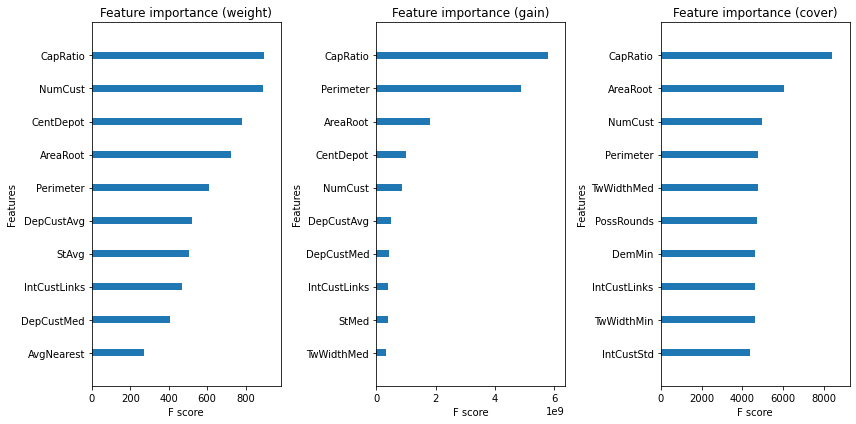

In [78]:
# Feature importance

from xgboost import plot_importance
# https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.plotting

fig, axs = plt.subplots(1, 3, figsize=(12,6))

plot_importance(
    xgb, 
    ax=axs[0], 
    height=0.2, 
    xlim=None,#(0, 600), 
    ylim=None, 
    title='Feature importance (weight)', 
    xlabel='F score', 
    ylabel='Features', 
    fmap='', 
    importance_type='weight', 
    max_num_features=10, 
    grid=False, 
    show_values=False, 
    #**kwargs
)

plot_importance(
    xgb, 
    ax=axs[1], 
    height=0.2, 
    xlim=None,#(0, 600), 
    ylim=None, 
    title='Feature importance (gain)', 
    xlabel='F score', 
    #ylabel='Features', 
    fmap='', 
    importance_type='gain', 
    max_num_features=10, 
    grid=False, 
    show_values=False, 
    #**kwargs
)

plot_importance(
    xgb, 
    ax=axs[2], 
    height=0.2, 
    xlim=None,#(0, 600), 
    ylim=None, 
    title='Feature importance (cover)', 
    xlabel='F score', 
    #ylabel='Features', 
    fmap='', 
    importance_type='cover', 
    max_num_features=10, 
    grid=False, 
    show_values=False, 
    #**kwargs
)

plt.tight_layout()
plt.show()